In [5]:
# Importação dos pacotes
from __future__ import print_function
import os
import sys
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [6]:
#EigenFace

#Cria matriz para ler a lista de imagens
def createDataMatrix(images):
    print("Creating data matrix",end=" ... ")
    numImages = len(images)
    sz = images[0].shape
    data = np.zeros((numImages, sz[0] * sz[1] * sz[2]), dtype=np.float32)
    for i in range(0, numImages):
        image = images[i].flatten()
        data[i,:] = image

    print("DONE")
    return data


In [7]:
# Lê as imagens no diretório
def readImages(path):
    print("Reading images from " + path, end="...")

    images = []

    for filePath in sorted(os.listdir(path)):
        fileExt = os.path.splitext(filePath)[1]
        if fileExt in [".jpg", ".jpeg"]:


            imagePath = os.path.join(path, filePath)
            im = cv2.imread(imagePath)

            if im is None :
                print("image:{} not read properly".format(imagePath))
            else :

                im = np.float32(im)/255.0

                images.append(im)

                imFlip = cv2.flip(im, 1);

                images.append(imFlip)
    numImages = int(len(images) / 2)

    if numImages == 0 :
        print("No images found")
        sys.exit(0)

    print(str(numImages) + " files read.")
    return images


In [8]:

def createNewFace(*args):
  
    output = averageFace
    

    for i in range(0, NUM_EIGEN_FACES):
        '''
        OpenCV does not allow slider values to be negative. 
        So we use weight = sliderValue - MAX_SLIDER_VALUE / 2
        ''' 
        sliderValues[i] = cv2.getTrackbarPos("Weight" + str(i), "Trackbars");
        weight = sliderValues[i] - MAX_SLIDER_VALUE/2
        output = np.add(output, eigenFaces[i] * weight)


    output = cv2.resize(output, (0,0), fx=2, fy=2)
    cv2.imshow("Result", output)

def resetSliderValues(*args):
    for i in range(0, NUM_EIGEN_FACES):
        cv2.setTrackbarPos("Weight" + str(i), "Trackbars", int(MAX_SLIDER_VALUE/2));
    createNewFace()
    
"""    
   1-Defina o número de Eigenfaces (NUM_EIGEN_FACES) como 10 e o valor máximo dos controles deslizantes (MAX_SLIDER_VALUE) 
     como 255. Esses números não são definidos em pedra. Altere esses números para ver como o aplicativo muda.
    
   2-Ler imagens : Em seguida, lemos todas as imagens no diretório especificado usando a função readImages . 
     O diretório contém imagens que estão alinhadas. O centro dos olhos esquerdo e direito em todas as imagens são os mesmos. 
     Nós adicionamos essas imagens a uma lista (ou vetor). Também invertemos as imagens na vertical e as adicionamos à lista. 
     Como a imagem espelhada de uma imagem facial válida, dobramos o tamanho do nosso conjunto de dados e o tornamos 
     simétrico ao mesmo tempo.
    
   3-Montar matriz de dados : Em seguida, usamos a função createDataMatrix para montar as imagens em uma matriz de dados. 
     Cada linha da matriz de dados é uma imagem. Vamos examinar a função createDataMatrix
     
   4-Calcular PCA : Em seguida, calculamos o PCA usando a classe PCA em C ++ (consulte as linhas 19-23 na 
     função principal acima) e a função PCACompute no Python (consulte a linha 23 na função principal acima). 
     Como saída do PCA, obtemos o vetor médio e os 10 vetores próprios.

   5-Remodelar vetores para obter Face Média e EigenFaces : o vetor médio e todo vetor próprio é um vetor de 
     comprimento w * h * 3, em que w é a largura, h é a altura e 3 é o número de canais de cores de qualquer imagem 
     no conjunto de dados. Em outras palavras, eles são vetores de 30k elementos. 
     Nós os remodelamos para o tamanho original da imagem para obter a face média e os EigenFaces. 
     Veja a linha 24-35 no código C ++ e as linhas 26-32 no código Python.
     
   6-Crie uma nova face com base nos valores do controle deslizante . Uma nova face pode ser criada adicionando EigenFaces 
     ponderados à face média usando a função createNewFace . No OpenCV, os valores do controle deslizante não podem ser 
     negativos. Portanto, calculamos os pesos subtraindo MAX_SLIDER_VALUE / 2 do valor atual do controle deslizante para 
     que possamos obter valores positivos e negativos.
"""
if __name__ == '__main__':

    NUM_EIGEN_FACES = 10

    MAX_SLIDER_VALUE = 255

    dirName = "C:\learnopencv-master\EigenFace\images"

    images = readImages(dirName)
    
    sz = images[0].shape

    data = createDataMatrix(images)

    print("Calculating PCA ", end="...")
    mean, eigenVectors = cv2.PCACompute(data, mean=None, maxComponents=NUM_EIGEN_FACES)
    print ("DONE")

    averageFace = mean.reshape(sz)

    eigenFaces = []; 

    for eigenVector in eigenVectors:
        eigenFace = eigenVector.reshape(sz)
        eigenFaces.append(eigenFace)

    cv2.namedWindow("Result", cv2.WINDOW_AUTOSIZE)
    
    output = cv2.resize(averageFace, (0,0), fx=2, fy=2)
    cv2.imshow("Result", output)

    cv2.namedWindow("Trackbars", cv2.WINDOW_AUTOSIZE)

    sliderValues = []
    
    for i in range(0, NUM_EIGEN_FACES):
        sliderValues.append(int(MAX_SLIDER_VALUE/2))
        cv2.createTrackbar( "Weight" + str(i), "Trackbars", int(MAX_SLIDER_VALUE/2), MAX_SLIDER_VALUE, createNewFace)
    
    cv2.setMouseCallback("Result", resetSliderValues);
    
    print('''Usage:
    Change the weights using the sliders
    Click on the result window to reset sliders
    Hit ESC to terminate program.''')

    cv2.waitKey(0)
    cv2.destroyAllWindows()


Reading images from C:\learnopencv-master\EigenFace\images...237 files read.
Creating data matrix ... DONE
Calculating PCA ...DONE
Usage:
    Change the weights using the sliders
    Click on the result window to reset sliders
    Hit ESC to terminate program.


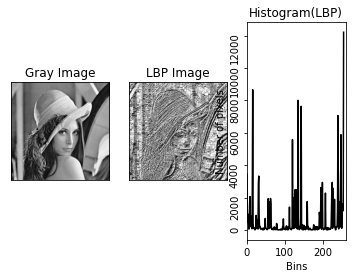

LBP Program is finished


In [9]:
# Local Binary Patterns Histograms

def get_pixel(img, center, x, y):
    new_value = 0
    try:
        if img[x][y] >= center:
            new_value = 1
    except:
        pass
    return new_value

def lbp_calculated_pixel(img, x, y):
    '''

     64 | 128 |   1
    ----------------
     32 |   0 |   2
    ----------------
     16 |   8 |   4    

    '''    
    center = img[x][y]
    val_ar = []
    val_ar.append(get_pixel(img, center, x-1, y+1))     # top_right
    val_ar.append(get_pixel(img, center, x, y+1))       # right
    val_ar.append(get_pixel(img, center, x+1, y+1))     # bottom_right
    val_ar.append(get_pixel(img, center, x+1, y))       # bottom
    val_ar.append(get_pixel(img, center, x+1, y-1))     # bottom_left
    val_ar.append(get_pixel(img, center, x, y-1))       # left
    val_ar.append(get_pixel(img, center, x-1, y-1))     # top_left
    val_ar.append(get_pixel(img, center, x-1, y))       # top
    
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
    val = 0
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
    return val    

def show_output(output_list):
    output_list_len = len(output_list)
    figure = plt.figure()
    for i in range(output_list_len):
        current_dict = output_list[i]
        current_img = current_dict["img"]
        current_xlabel = current_dict["xlabel"]
        current_ylabel = current_dict["ylabel"]
        current_xtick = current_dict["xtick"]
        current_ytick = current_dict["ytick"]
        current_title = current_dict["title"]
        current_type = current_dict["type"]
        current_plot = figure.add_subplot(1, output_list_len, i+1)
        if current_type == "gray":
            current_plot.imshow(current_img, cmap = plt.get_cmap('gray'))
            current_plot.set_title(current_title)
            current_plot.set_xticks(current_xtick)
            current_plot.set_yticks(current_ytick)
            current_plot.set_xlabel(current_xlabel)
            current_plot.set_ylabel(current_ylabel)
        elif current_type == "histogram":
            current_plot.plot(current_img, color = "black")
            current_plot.set_xlim([0,260])
            current_plot.set_title(current_title)
            current_plot.set_xlabel(current_xlabel)
            current_plot.set_ylabel(current_ylabel)            
            ytick_list = [int(i) for i in current_plot.get_yticks()]
            current_plot.set_yticklabels(ytick_list,rotation = 90)

    plt.show()
    
def main():
    image_file = 'lenna.jpg'
    img_bgr = cv2.imread(image_file)
    height, width, channel = img_bgr.shape
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    
    img_lbp = np.zeros((height, width,3), np.uint8)
    for i in range(0, height):
        for j in range(0, width):
             img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
    hist_lbp = cv2.calcHist([img_lbp], [0], None, [256], [0, 256])
    output_list = []
    output_list.append({
        "img": img_gray,
        "xlabel": "",
        "ylabel": "",
        "xtick": [],
        "ytick": [],
        "title": "Gray Image",
        "type": "gray"        
    })
    output_list.append({
        "img": img_lbp,
        "xlabel": "",
        "ylabel": "",
        "xtick": [],
        "ytick": [],
        "title": "LBP Image",
        "type": "gray"
    })    
    output_list.append({
        "img": hist_lbp,
        "xlabel": "Bins",
        "ylabel": "Number of pixels",
        "xtick": None,
        "ytick": None,
        "title": "Histogram(LBP)",
        "type": "histogram"
    })

    show_output(output_list)
                             
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    print("LBP Program is finished")

if __name__ == '__main__':
    main()